In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [4]:
len(glob('UCF11_updated_mpg/*/*/*.mpg'))
file_paths = glob('UCF11_updated_mpg/*/*/*.mpg')

In [6]:
print(file_paths[0])
cap = cv2.VideoCapture(file_paths[0])

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (256, 256))
    frame = frame[:, :, [2, 1, 0]] #BGR -> RGB
    frames.append(frame)
cap.release()

UCF11_updated_mpg/biking/v_biking_12/v_biking_12_01.mpg


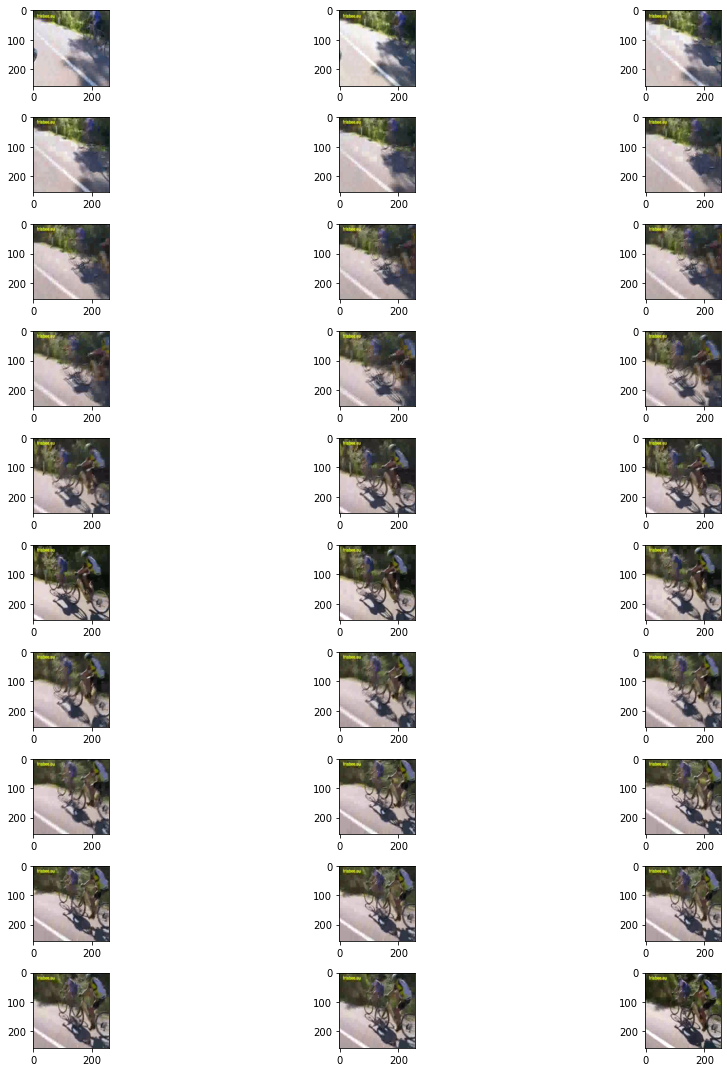

In [13]:
arr = np.array(frames)
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(10, 3, 1 + 3*i)
    plt.imshow(arr[1 + 3*i])
    plt.subplot(10, 3, 2 + 3*i)
    plt.imshow(arr[2 + 3*i])
    plt.subplot(10, 3, 3 + 3*i)
    plt.imshow(arr[3 + 3*i])
plt.tight_layout()

In [15]:
len(frames) / 29.97

8.008008008008009

In [16]:
for file_path in file_paths:
    cap = cv2.VideoCapture(file_path)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(file_path)
    print(length, 'frames')
    print(length / 29.97, 'sec')
    cap.release()
    break

UCF11_updated_mpg/biking/v_biking_12/v_biking_12_01.mpg
239 frames
7.974641307974641 sec


In [17]:
import pandas as pd

df = pd.DataFrame(columns=[
    'file_path', 'frames', 'duration',
    'label'
])

for file_path in file_paths:
    label = file_path.split('/')[1]
    
    cap = cv2.VideoCapture(file_path)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frames / 29.97
    elem = {
        'file_path': file_path,
        'frames': frames,
        'duration': duration,
        'label': label
    }
    df.loc[len(df)] = elem
    cap.release()

In [18]:
df

,file_path,frames,duration,label
0,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,239,7.974641,biking
1,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,201,6.706707,biking
2,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,201,6.706707,biking
3,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,203,6.773440,biking
4,UCF11_updated_mpg/biking/v_biking_23/v_biking_...,598,19.953287,biking
...,...,...,...,...
1595,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,111,3.703704,golf_swing
1596,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,286,9.542876,golf_swing
1597,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,149,4.971638,golf_swing
1598,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,201,6.706707,golf_swing


In [23]:
df_duration_sum_by_label = df.groupby('label').\
    duration.sum().rename('Sum').reset_index().\
    set_index('label')

df_duration_avg_by_label = df.groupby('label').\
    duration.mean().rename('Average').reset_index().\
    set_index('label')

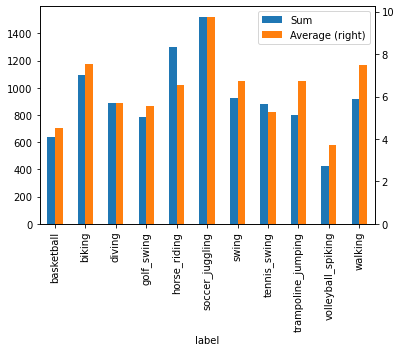

In [26]:
df_video_stats = \
    pd.concat([df_duration_sum_by_label, df_duration_avg_by_label],
              axis=1)
df_video_stats.plot.bar(secondary_y='Average')

In [29]:
df['> 10.0 Sec'] = df['duration'] >= 10.0
df['5.0 - 10.0 Sec'] = \
    (5.0 <= df['duration']) & (df['duration'] < 10.0)
df['2.0 - 5.0 Sec'] = \
    (2.0 <= df['duration']) & (df['duration'] < 5.0)
df['0.0 - 2.0 Sec'] = \
    (0.0 <= df['duration']) & (df['duration'] < 2.0)
df

,file_path,frames,duration,label,> 10.0 Sec,5.0 - 10.0 Sec,2.0 - 5.0 Sec,0.0 - 2.0 Sec
0,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,239,7.974641,biking,False,True,False,False
1,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,201,6.706707,biking,False,True,False,False
2,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,201,6.706707,biking,False,True,False,False
3,UCF11_updated_mpg/biking/v_biking_12/v_biking_...,203,6.773440,biking,False,True,False,False
4,UCF11_updated_mpg/biking/v_biking_23/v_biking_...,598,19.953287,biking,True,False,False,False
...,...,...,...,...,...,...,...,...
1595,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,111,3.703704,golf_swing,False,False,True,False
1596,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,286,9.542876,golf_swing,False,True,False,False
1597,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,149,4.971638,golf_swing,False,False,True,False
1598,UCF11_updated_mpg/golf_swing/v_golf_19/v_golf_...,201,6.706707,golf_swing,False,True,False,False


In [41]:
df_groupby_label = df.groupby('label')
df_groupby_stats = pd.concat([
    df_groupby_label['0.0 - 2.0 Sec'].
    sum().reset_index().set_index('label'),
    df_groupby_label['2.0 - 5.0 Sec'].
    sum().reset_index().set_index('label'),
    df_groupby_label['5.0 - 10.0 Sec'].
    sum().reset_index().set_index('label'),
    df_groupby_label['> 10.0 Sec'].
    sum().reset_index().set_index('label'),
], axis=1)

df_groupby_stats

,0.0 - 2.0 Sec,2.0 - 5.0 Sec,5.0 - 10.0 Sec,> 10.0 Sec
label,,,,
basketball,5,102,28,6
biking,0,9,113,23
diving,2,57,91,6
golf_swing,0,79,56,7
horse_riding,2,14,180,2
soccer_juggling,0,9,88,59
swing,0,15,104,18
tennis_swing,0,90,70,7
trampoline_jumping,0,12,101,6


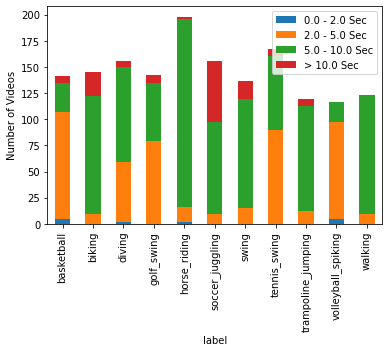

In [42]:
df_groupby_stats.plot.bar(stacked=True,
                          ylabel='Number of Videos')